In [3]:
import main
import pandas as pd
import networkx as nx
from EmergencyUnit import EmergencyUnit

{}

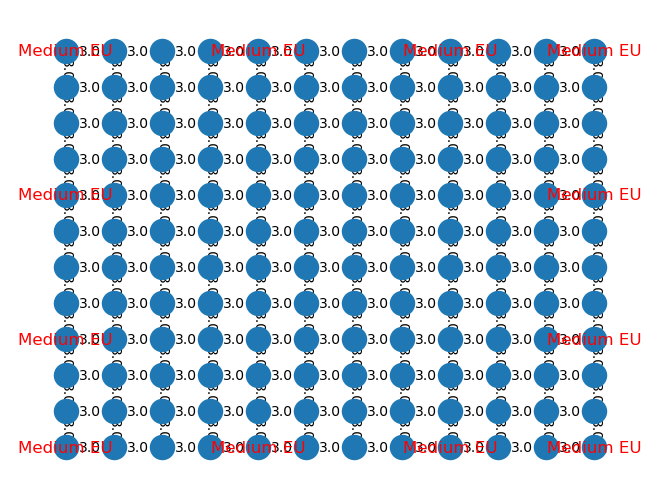

In [4]:
city = main.configure_city_file('corner_medium_ps.txt')
units = EmergencyUnit.response_buildings
small_unit_locs = [unit.location for unit in units if unit.available_capacity==3]
medium_unit_locs = [unit.location for unit in units if unit.available_capacity==5]
large_unit_locs = [unit.location for unit in units if unit.available_capacity==7]

small_emergency_unit_labels = dict()
medium_emergency_unit_labels = dict()
large_emergency_unit_labels = dict()
pos=dict()
node_coordinates=list(city.city_graph.nodes)
width = city.width
height = city.height
dim = city.zone_dimension
for i in range(len(node_coordinates)):
    pos[node_coordinates[i]]=(node_coordinates[i][1], (height*dim-1)-node_coordinates[i][0])
    if node_coordinates[i] in small_unit_locs:
        small_emergency_unit_labels[node_coordinates[i]] = 'Small EU'
    elif node_coordinates[i] in medium_unit_locs:
        medium_emergency_unit_labels[node_coordinates[i]] = 'Medium EU'
    elif node_coordinates[i] in large_unit_locs:
        large_emergency_unit_labels[node_coordinates[i]] = 'Large EU'
traffic_time_labels = nx.get_edge_attributes(city.city_graph,'adjusted_time')
nx.draw(city.city_graph, pos)
nx.draw_networkx_edge_labels(city.city_graph,pos,edge_labels=traffic_time_labels)
nx.draw_networkx_labels(city.city_graph, pos, small_emergency_unit_labels, font_size=12, font_color='r')
nx.draw_networkx_labels(city.city_graph, pos, medium_emergency_unit_labels, font_size=12, font_color='r')
nx.draw_networkx_labels(city.city_graph, pos, large_emergency_unit_labels, font_size=12, font_color='r')

In [10]:
resp_times, successful_perc, emergencies, plotting_emergency_dict = main.simulate(city)
# traffic_time_labels = nx.get_edge_attributes(city.city_graph,'adjusted_time')
# nx.draw(city.city_graph, pos)
# nx.draw_networkx_edge_labels(city.city_graph,pos,edge_labels=traffic_time_labels)
# nx.draw_networkx_labels(city.city_graph, pos, emergency_unit_labels, font_size=10, font_color='r')

100%|██████████| 100/100 [01:11<00:00,  1.39it/s]


In [ ]:
df1 = pd.DataFrame({'Average Response Time': resp_times}, index = [_ for _ in range(1, 101)])
plot1 = df1.plot(title = 'Covergence of Average Response Time of Emergencies')
plot1.set(xlabel='Number of Simulation Runs', ylabel='Average Response Time (mins)')
# plot1.show()
df2 = pd.DataFrame({'Percentage of Successfully Responded Emergencies': successful_perc}, index = [_ for _ in range(1, 101)])
plot2 = df2.plot(title = 'Covergence of Percentage of Successfully Responded Emergencies')
plot2.set(xlabel='Number of Simulation Runs', ylabel='Average Percentage of Successfully Responded Emergencies')
# plot2.show()

In [ ]:
print("Average Response Time: {} mins".format(round(resp_times[-1], 2)))
print("Average Percentage of Successfully Responded Emergencies: {} %".format(round(successful_perc[-1], 2)))

In [15]:
node_coordinates=list(city.city_graph.nodes)
color_map= {}
for emergency in plotting_emergency_dict:
    units_to_plot = plotting_emergency_dict[emergency]
    for i in range(len(node_coordinates)):
        #pos[node_coordinates[i]]=(node_coordinates[i][1], (height*dim-1)-node_coordinates[i][0])
        if node_coordinates[i] == emergency:
            color_map[node_coordinates[i]] = "red"
        elif node_coordinates[i] in units_to_plot:
            color_map[node_coordinates[i]] = "green"
        else:
            color_map[node_coordinates[i]] = "black"
    break
print(color_map)

{(0, 0): 'black', (0, 1): 'black', (0, 2): 'black', (0, 3): 'black', (0, 4): 'black', (0, 5): 'black', (0, 6): 'black', (0, 7): 'black', (0, 8): 'black', (0, 9): 'black', (0, 10): 'black', (0, 11): 'black', (1, 0): 'black', (1, 1): 'black', (1, 2): 'black', (1, 3): 'black', (1, 4): 'black', (1, 5): 'black', (1, 6): 'black', (1, 7): 'black', (1, 8): 'black', (1, 9): 'black', (1, 10): 'black', (1, 11): 'black', (2, 0): 'black', (2, 1): 'black', (2, 2): 'black', (2, 3): 'black', (2, 4): 'black', (2, 5): 'black', (2, 6): 'black', (2, 7): 'black', (2, 8): 'black', (2, 9): 'black', (2, 10): 'black', (2, 11): 'black', (3, 0): 'black', (3, 1): 'black', (3, 2): 'black', (3, 3): 'black', (3, 4): 'black', (3, 5): 'black', (3, 6): 'black', (3, 7): 'black', (3, 8): 'black', (3, 9): 'black', (3, 10): 'black', (3, 11): 'black', (4, 0): 'green', (4, 1): 'black', (4, 2): 'black', (4, 3): 'red', (4, 4): 'black', (4, 5): 'black', (4, 6): 'black', (4, 7): 'black', (4, 8): 'black', (4, 9): 'black', (4, 10)

In [16]:
colors = [ color_map.get(node) for node in city.city_graph.nodes]

['black',
 'black',
 'black',
 'black',
 'black',
 'black',
 'black',
 'black',
 'black',
 'black',
 'black',
 'black',
 'black',
 'black',
 'black',
 'black',
 'black',
 'black',
 'black',
 'black',
 'black',
 'black',
 'black',
 'black',
 'black',
 'black',
 'black',
 'black',
 'black',
 'black',
 'black',
 'black',
 'black',
 'black',
 'black',
 'black',
 'black',
 'black',
 'black',
 'black',
 'black',
 'black',
 'black',
 'black',
 'black',
 'black',
 'black',
 'black',
 'green',
 'black',
 'black',
 'red',
 'black',
 'black',
 'black',
 'black',
 'black',
 'black',
 'black',
 'black',
 'black',
 'black',
 'black',
 'black',
 'black',
 'black',
 'black',
 'black',
 'black',
 'black',
 'black',
 'black',
 'black',
 'black',
 'black',
 'black',
 'black',
 'black',
 'black',
 'black',
 'black',
 'black',
 'black',
 'black',
 'black',
 'black',
 'black',
 'black',
 'black',
 'black',
 'black',
 'black',
 'black',
 'black',
 'black',
 'black',
 'black',
 'black',
 'black',
 'black',
 '

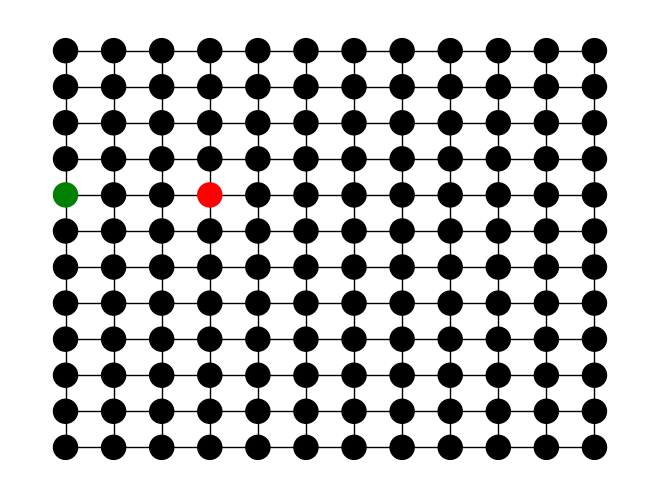

In [17]:
nx.draw(city.city_graph, pos, node_color = colors)

In [14]:
plotting_emergency_dict

{(4, 3): [(4, 0)], (9, 11): [(8, 11), (11, 11)], (1, 1): [(0, 0)]}